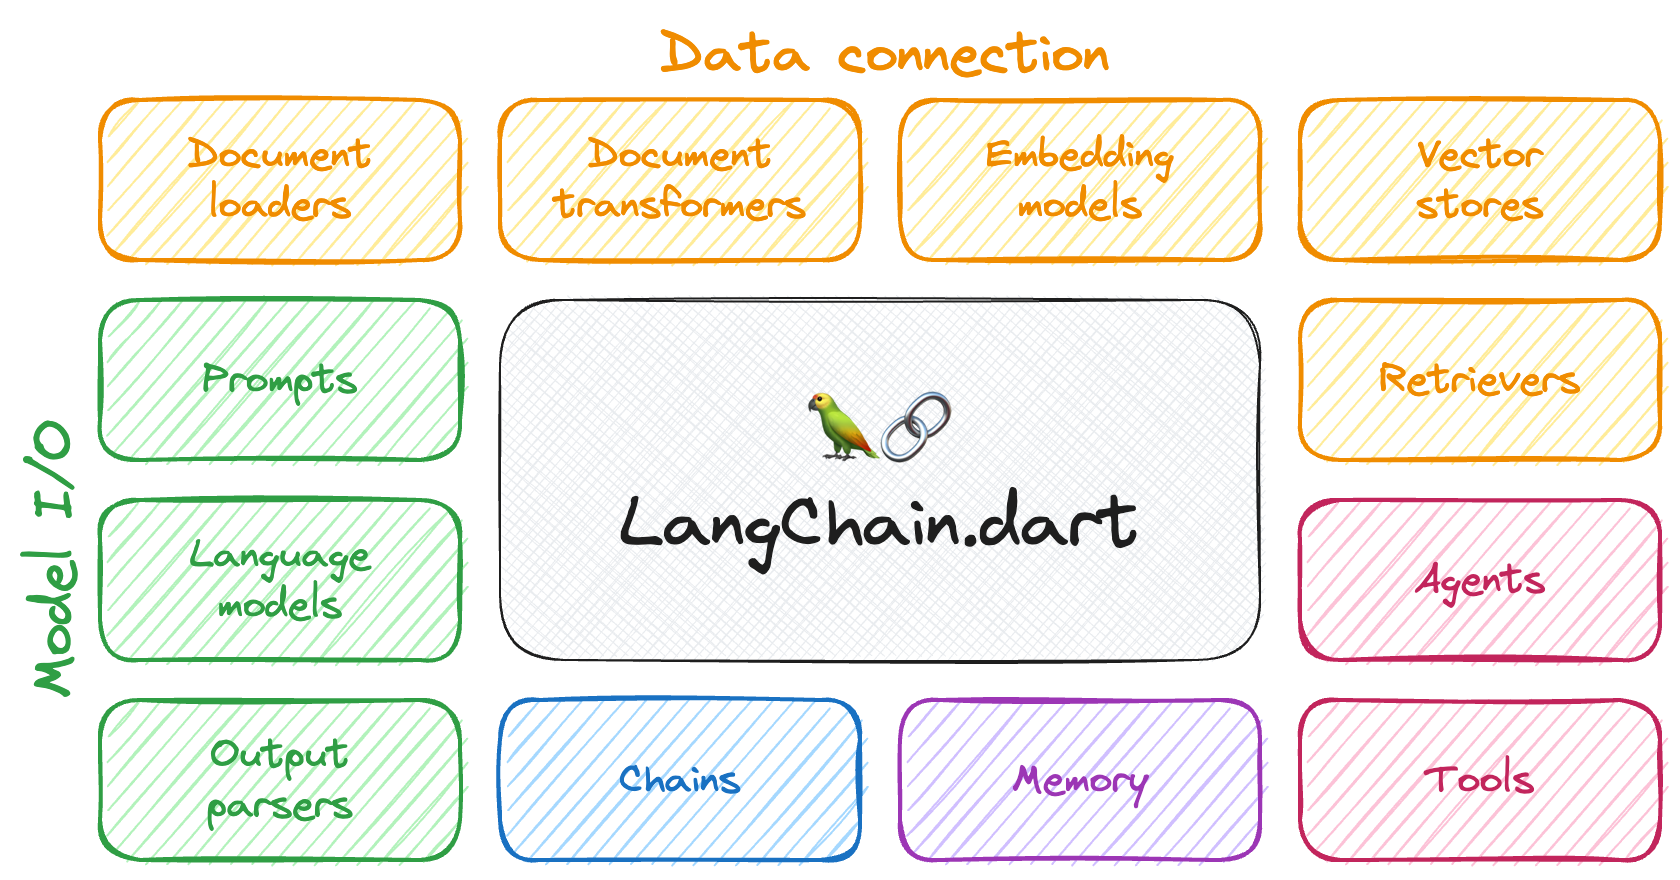

# Why langchain and for what?
1. Explore multiple LLM offerings and test what works best for their use cases
2. Out-of-the-Box Solutions: Prompt chaining, Logging, Persistent memory, Efficient connections to multiple data sources
3. Huge open-source community, 66K⭐️

## Applications
1. Question answering
2. Summarization
3. Chat bots
4. Web research

# QA System

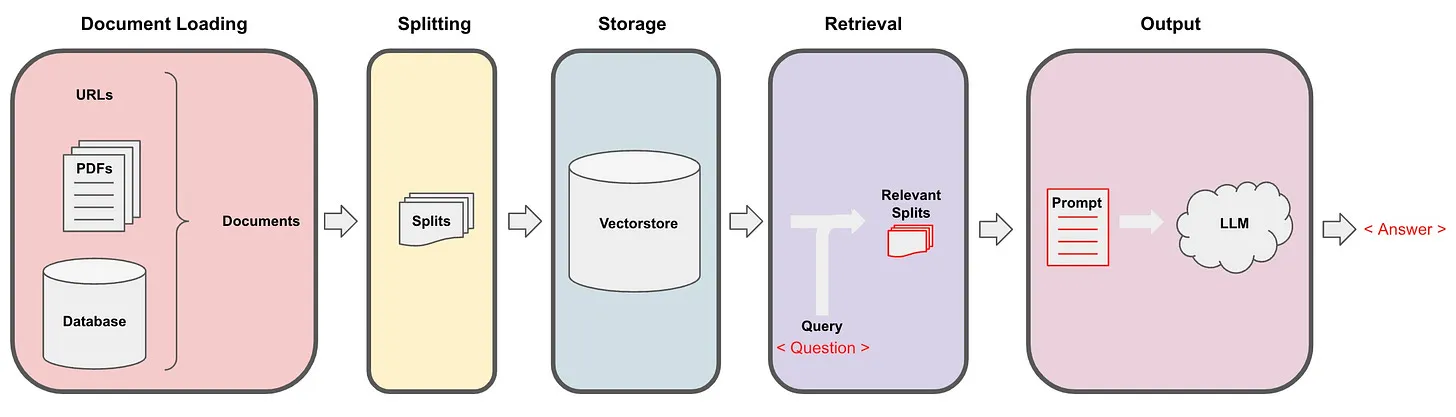

# Installation

In [21]:
!pip install langchain -q
!pip install pypdf -q
!pip install openai -q
!pip install python-dotenv -q
!pip install tiktoken -q
!pip install chromadb -q

# Document Loading

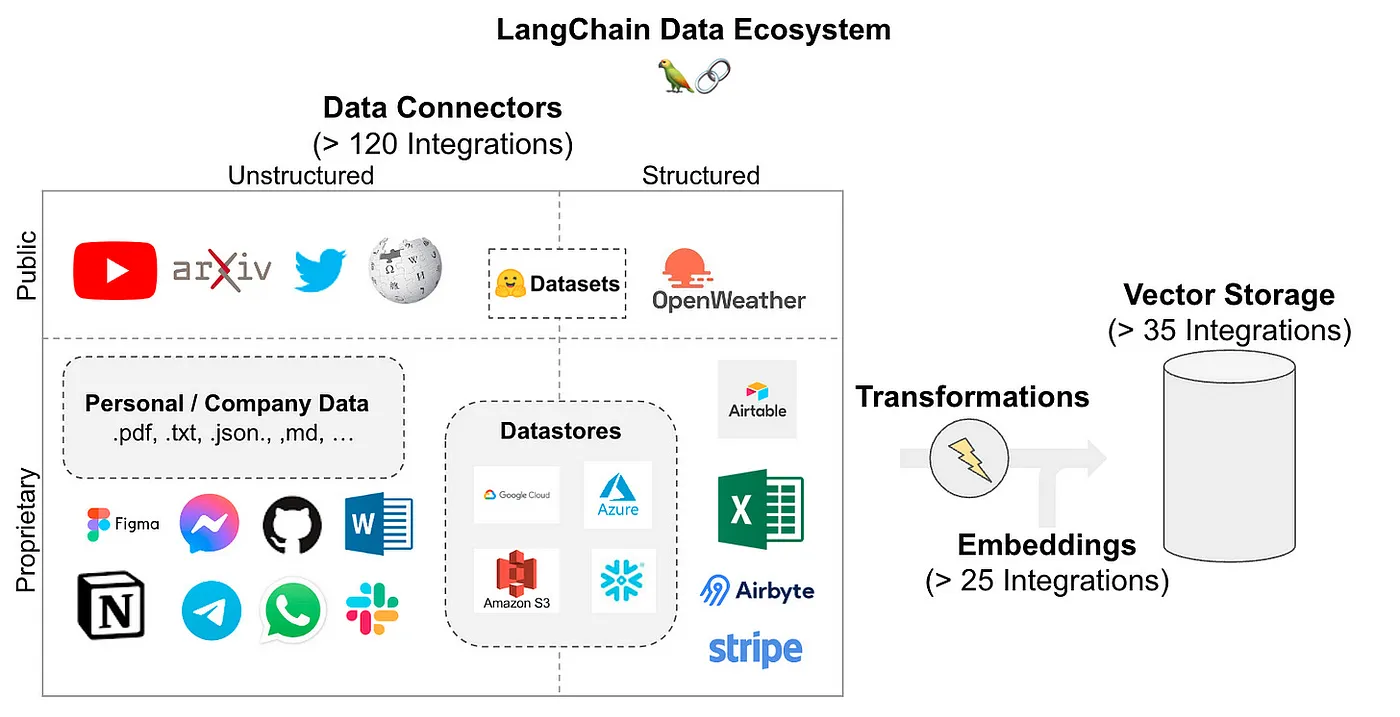

## PDFLoader

In [11]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("dall-e-3.pdf")
pages = loader.load()

In [12]:
len(pages)

19

In [13]:
page = pages[0]
page

Document(page_content='Improving Image Generation with Better Captions\nJames Betker∗†\njbetker@openai.comGabriel Goh∗†\nggoh@openai.comLi Jing∗†\nlijing@openai.comTim Brooks†\nJianfeng Wang‡Linjie Li‡Long Ouyang†Juntang Zhuang†Joyce Lee†Yufei Guo†\nWesam Manassra†Prafulla Dhariwal†Casey Chu†Yunxin Jiao†\nAditya Ramesh∗†\naramesh@openai.com\nAbstract\nWe show that prompt following abilities of text-to-image models can be sub-\nstantially improved by training on highly descriptive generated image captions.\nExisting text-to-image models struggle to follow detailed image descriptions and\noften ignore words or confuse the meaning of prompts. We hypothesize that this\nissue stems from noisy and inaccurate image captions in the training dataset. We\naddress this by training a bespoke image captioner and use it to recaption the\ntraining dataset. We then train several text-to-image models and find that training\non these synthetic captions reliably improves prompt following ability. Finally

In [9]:
page.metadata

{'source': 'dall-e-3.pdf', 'page': 0}

## WebLoader

In [10]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://openai.com/dall-e-3")

In [12]:
docs = loader.load()

In [13]:
docs[0]

Document(page_content="\n\n\nDALL·E 3\n\n\n\n\n\n\n\n\n\n\n\nCloseSearch Submit Skip to main contentSite NavigationResearchOverviewIndexGPT-4DALL·E 3APIOverviewData privacyPricingDocsChatGPTOverviewEnterpriseTry ChatGPTSafetyCompanyAboutBlogCareersResidencyCharterSecurityCustomer storiesSearch Navigation quick links Log inTry ChatGPTMenu Mobile Navigation CloseSite NavigationResearchAPIChatGPTSafetyCompany Quick Links Log inTry ChatGPTSearch Submit DALL·E 3DALL·E\xa03 understands significantly more nuance and detail than our previous systems, allowing you to easily translate your ideas into exceptionally accurate images.Quick linksRead research paperTry in ChatGPTAbout DALL·E 3DALL·E 3 is now available to all ChatGPT Plus and Enterprise users, and will be available via the API and in\xa0Labs\xa0later this fall.Modern text-to-image systems have a tendency to ignore words or descriptions, forcing users to learn prompt engineering. DALL·E 3 represents a leap forward in our ability to gene

# Document Splitting

## Recursive splitting details

In [14]:
from langchain.text_splitter import RecursiveCharacterTextSplitter, CharacterTextSplitter

In [15]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, 
    chunk_overlap=500,
    separators=['\n\n', '\n', ' ', '']
)

splitted_documents = text_splitter.split_documents(pages)

In [74]:
len(splitted_documents)

59

In [72]:
splitted_documents[0].page_content

'Improving Image Generation with Better Captions\nJames Betker∗†\njbetker@openai.comGabriel Goh∗†\nggoh@openai.comLi Jing∗†\nlijing@openai.comTim Brooks†\nJianfeng Wang‡Linjie Li‡Long Ouyang†Juntang Zhuang†Joyce Lee†Yufei Guo†\nWesam Manassra†Prafulla Dhariwal†Casey Chu†Yunxin Jiao†\nAditya Ramesh∗†\naramesh@openai.com\nAbstract\nWe show that prompt following abilities of text-to-image models can be sub-\nstantially improved by training on highly descriptive generated image captions.\nExisting text-to-image models struggle to follow detailed image descriptions and\noften ignore words or confuse the meaning of prompts. We hypothesize that this\nissue stems from noisy and inaccurate image captions in the training dataset. We\naddress this by training a bespoke image captioner and use it to recaption the\ntraining dataset. We then train several text-to-image models and find that training\non these synthetic captions reliably improves prompt following ability. Finally, we'

In [73]:
splitted_documents[1].page_content

'training dataset. We then train several text-to-image models and find that training\non these synthetic captions reliably improves prompt following ability. Finally, we\nuse these findings to build DALL-E 3: a new text-to-image generation system, and\nbenchmark its performance on an evaluation designed to measure prompt following,\ncoherence, and aesthetics, finding that it compares favorably to competitors. We\npublish samples and code for these evaluations so that future research can continue\noptimizing this important aspect of text-to-image systems.\n1 Introduction\nRecent advances in generative modeling have allowed text-to-image generative models to achieve\ndrastic performance improvements. In particular, tackling the problem with sampling-based ap-\nproaches such as autoregressive generative modeling[ 27,2,1,20,30] or using diffusion processes[ 25,\n6,11,12,19,22] have allowed us to decompose the problem of image generation into small, discrete'

# Vectorstores and embeddings

## Embeddings

In [17]:
import os
import openai
import sys
sys.path.append('../..')

from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.environ['OPENAI_API_KEY']

In [18]:
from langchain.embeddings import HuggingFaceEmbeddings
HuggingFaceEmbeddings("ruBert") "e5-multilungual", "xlm-roberta-multilingual"
embedding = OpenAIEmbeddings() # text-embedding-ada-002 # vector size 1536

In [19]:
sentence1 = "i like dogs"
sentence2 = "i like canines"
sentence3 = "the weather is ugly outside"
embedding1 = embedding.embed_query(sentence1)
embedding2 = embedding.embed_query(sentence2)
embedding3 = embedding.embed_query(sentence3)

import numpy as np
print(np.dot(embedding1, embedding2))
print(np.dot(embedding1, embedding3))
print(np.dot(embedding2, embedding3))

0.9631675619330509
0.771044218337157
0.7596465216663827


## Vectorstores

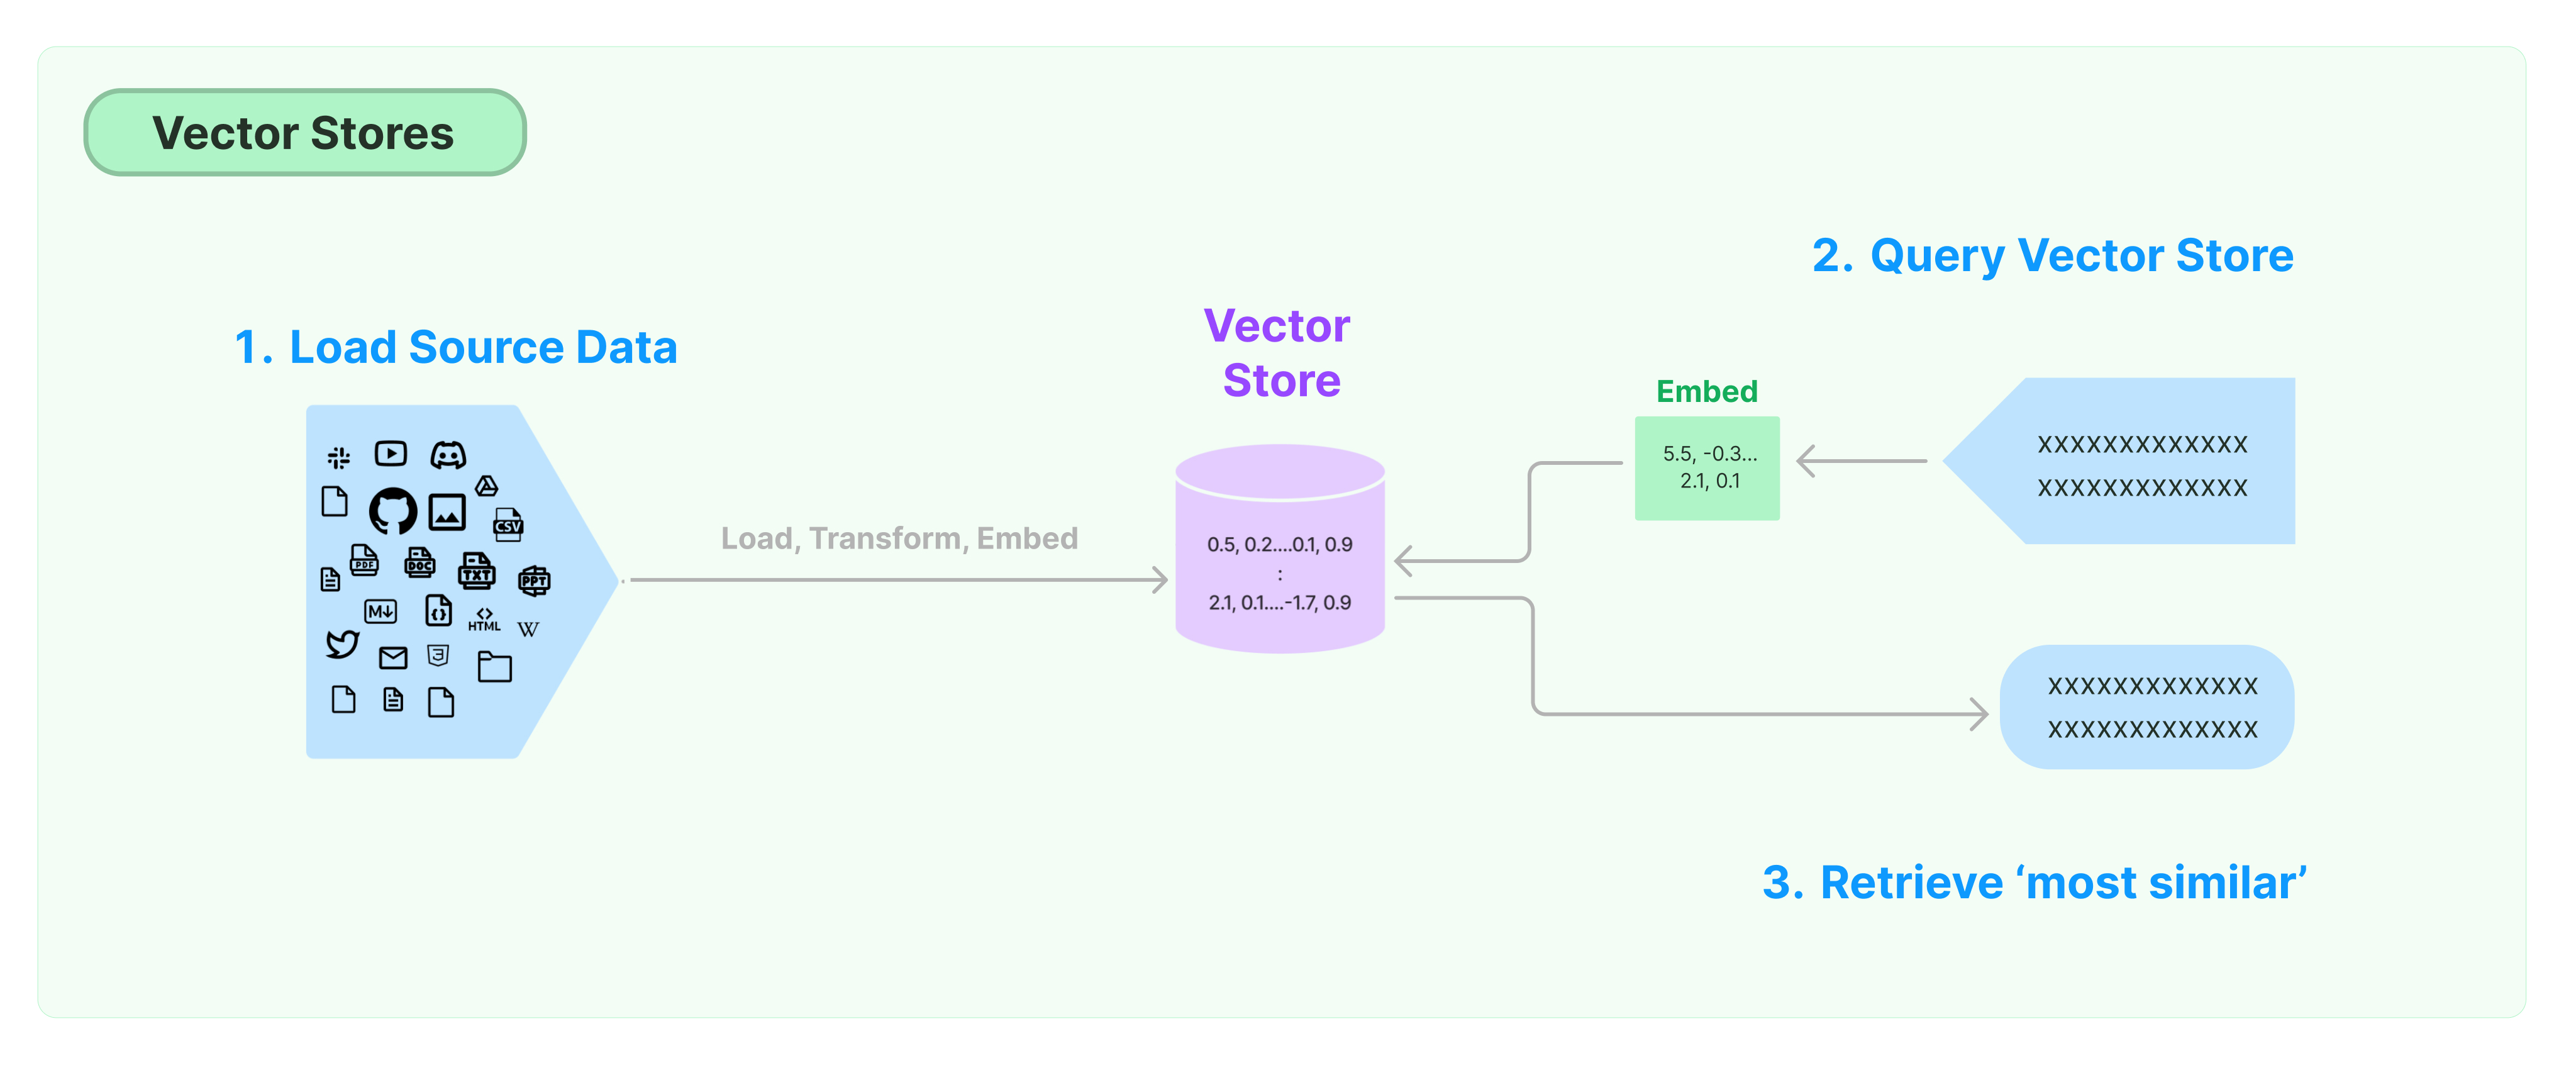
1. Chromadb
2. Faiss
3. Pinecone
4. Qdrant
5. Milvus

In [22]:
from langchain.vectorstores import Chroma
persist_directory = 'docs/chroma/'

vectordb = Chroma.from_documents(
    documents=splitted_documents,
    embedding=embedding,
    persist_directory=persist_directory
)

print(vectordb._collection.count())

59


## Similarity search

In [75]:
question = "What text encoder is used in the model?"
docs = vectordb.similarity_search(question, k=3)

docs

[Document(page_content='suspect this may have to do with the T5 text encoder we used: when the model encounters text in a prompt, it\nPhoto of a serene park setting. On the left,\na golden retriever sits attentively, gazing\nforward with its tongue out. On the right,\na tabby cat lounges lazily, stretching its\nlegs out and looking towards the dog with\na curious expression.Cartoon drawing of an outer space scene.\nAmidst floating planets and twinkling\nstars, a whimsical horse with exaggerated\nfeatures rides an astronaut, who swims\nthrough space with a jetpack, looking a\ntad overwhelmed.Arum dioscoridis.\nFigure 7 – Examples of common failure modes of DALL-E 3\n13', metadata={'page': 12, 'source': 'dall-e-3.pdf'}),
 Document(page_content='A Image decoder\nThe image decoder used in our experiments is a text-conditioned U-Net[23] latent diffusion model[22] with\nthree stages.\nWe use the same V AE[ 9] developed by Rombach et al. (2022) for our model. This autoencoder performs 8x\ndow

In [64]:
retriever = vectordb.as_retriever() # VectorStoreRetriever

# Question Answering

In [76]:
retriever = vectordb.as_retriever() # VectorStoreRetriever

In [77]:
llm_name = "gpt-3.5-turbo"

In [78]:
from langchain.chat_models import ChatOpenAI
llm = ChatOpenAI(model_name=llm_name, temperature=0)

In [79]:
from langchain.chains import RetrievalQA

In [80]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=retriever,
    map_reduce
)

In [81]:
result = qa_chain({"query": question})
print(result["result"])

The model uses a T5 XXL text encoder.


In [ ]:
Answer me in this "What text encoder is used in the model?" using context "context"  -> LLM

## Add prompt

In [82]:
from langchain.prompts import PromptTemplate

template = """Use the following pieces of context to answer the question at the end. If you don't know the answer, just say that you don't know, don't try to make up an answer. Use three sentences maximum. Keep the answer as concise as possible. Always say "thanks for asking!" at the end of the answer. 
{context}
Question: {question}
Helpful Answer:"""
QA_CHAIN_PROMPT = PromptTemplate.from_template(template)

In [83]:
qa_chain = RetrievalQA.from_chain_type(
    llm,
    retriever=vectordb.as_retriever(),
    return_source_documents=True,
    chain_type_kwargs={"prompt": QA_CHAIN_PROMPT}
)

In [85]:
result = qa_chain({"query": question})
print(result["result"])

The model uses a T5 XXL text encoder. Thanks for asking!


# Streamlit App Example
https://github.com/Anil-matcha/ChatPDF